Download the dataset  before you add your own scores to the document. Do that by copying the lines with my scores (nilstesd). Replace nilstesd with your own NTNUusername and edit the scores. If you don't know a dish you can delete that line. But you need to add scores for at least 10 dishes, otherwise we might get errors in the 2nd exercise. Do not add your own dishes!
Part 1
Create a diagram of choice that shows the average score for each dish. Attach the code and the graphic to the submission.
Hint: after loading the dataset into df, use the following code to find the averages:
mean = df.groupby(['Dish']).mean()
labels = mean.index.values
values = mean['Score'].values

In [106]:
import numpy
import pandas as pd
from matplotlib import pyplot as plt

In [107]:
df = pd.read_csv('data/dishes.txt', sep=";")
df.shape

(879, 3)

In [108]:
mean = df.groupby(['Dish']).mean()
labels = mean.index.values
values = mean['Score'].values

Text(0.5, 0, 'Mean Score')

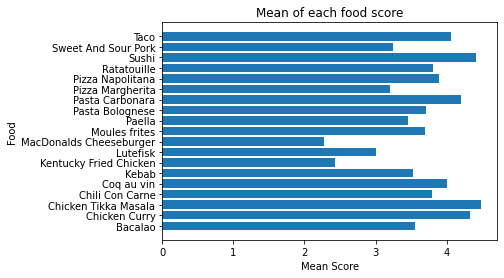

In [109]:
plt.barh(labels, values)
plt.title('Mean of each food score')
plt.ylabel('Food')
plt.xlabel('Mean Score')

In [110]:
from sklearn import manifold

In [111]:
df = df.pivot_table(index="UserName", columns="Dish", values="Score")
df = df.T
distance = lambda column1, column2: pd.np.linalg.norm((column1 - column2).fillna(0))
distances = df.apply(lambda column2: df.apply(lambda column1: distance(column1, column2)))

<ipython-input-111-407284ba0eb7>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  distance = lambda column1, column2: pd.np.linalg.norm((column1 - column2).fillna(0))


In [112]:
mds = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=6)
results = mds.fit(distances)
coords = results.embedding_


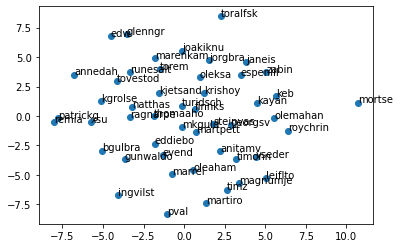

In [113]:
plt.scatter(coords[:,0],coords[:,1], marker='o')

for label, x, y in zip(df.columns.values, coords[:,0],coords[:,1]):
    plt.annotate(
        label,
        xy = (x,y))

In [114]:
me = 'mortse'
neighbors = distances[me].drop(me)

k = 4
ordered_neighbors = neighbors.sort_values()
nearest_neighbors = ordered_neighbors[0:k]


In [117]:
ratings = df
ratings = ratings.fillna(0)

rec = ratings[me] * 0

for i in nearest_neighbors.index:
    dist = distances.loc[me,i]

    weight = 1/(1+dist)

    print(f"Username = {i}, distance = {dist}, vekt = {weight}")

    rec = rec + (ratings[i] * weight)

rec = rec.sort_values(ascending=False)
print(f"Matretter å spise sammen: {rec}")

Username = timonn, distance = 8.774964387392123, vekt = 0.1023021629920016
Username = steinvas, distance = 8.888194417315589, vekt = 0.10113069765789216
Username = zabin, distance = 9.055385138137417, vekt = 0.0994491992362644
Username = turidsch, distance = 9.219544457292887, vekt = 0.09785171972967724
Anbefalte metretter å spise sammen: Dish
Chicken Tikka Masala       2.204249
Taco                       2.107653
Chicken Curry              2.104290
Kebab                      1.906989
Sushi                      1.894063
Pasta Bolognese            1.809647
Pasta Carbonara            1.705237
Moules frites              1.604533
Sweet And Sour Pork        1.408403
Lutefisk                   1.403953
Chili Con Carne            1.304504
Pizza Napolitana           1.214891
Kentucky Fried Chicken     1.009351
MacDonalds Cheeseburger    1.000792
Ratatouille                0.999514
Coq au vin                 0.888653
Pizza Margherita           0.812050
Bacalao                    0.394602
Paella